# Figure 1

We use a power-transform to estimate the shape of the nonlinear
shape of the genotype-phenotype map.

In [1]:
#%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np

from gpmap import GenotypePhenotypeMap
from epistasis.stats import pearson
from epistasis import pyplot

from epistasis.models.nonlinear.power import EpistasisPowerTransform
from epistasis.models.nonlinear.ordinary import EpistasisNonlinearRegression


## Data set IV

In [2]:
# Path to dataset
dataset = "anderson"
path_data = "../datasets/" + dataset + ".json"

In [3]:
# Import dataset
import json
filename = path_data
with open(filename, "r") as f:
    data_json = json.load(f)

# Print json keys
print(data_json.keys())

dict_keys(['figure', 'authors', 'log_transform', 'columns', 'stdeviations', 'filename', 'genotypes', 'journal', 'mutations', 'phenotypes', 'replicate 1', 'replicate 2', 'replicate 3', 'title', 'url', 'wildtype', 'n_replicates'])


In [4]:
#model = EpistasisPowerTransform.read_json(path_data, order=1, model_type="global")
# Preprocessing the phenotype scaling
R = 1.9872036e-3
T = 293

data_json["phenotypes"] =  - np.log(data_json["phenotypes"] ) *R*T
gpm = GenotypePhenotypeMap(wildtype=data_json["wildtype"],
                           genotypes=data_json["genotypes"],
                           phenotypes= (data_json["phenotypes"]),
                           stdeviations=data_json["stdeviations"])

In [5]:
# Construct the phenotype data
model = EpistasisPowerTransform(lmbda=-1, A=0, B=0,order=1)
# Add Genotype-phenotype map data.
model.add_gpm(gpm)
# Fit the model.
model.fit()

EpistasisPowerTransform(model_type='global')

In [6]:
# Show parameter fitted
model.parameters

name,value,standard error,relative error,initial value,min,max,vary
lmbda,2.92757678,3.67692494,(125.60%),-1,-inf,inf,True
A,-2.33629402,8.47861763,(362.91%),0,-5.15712592,inf,True
B,5.15900821,1.05186038,(20.39%),0,-inf,inf,True


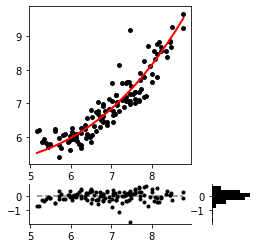

In [7]:
padd = model.Additive.predict()

################### Plotting ######################
fig = plt.figure(figsize=(4,4))
gs = gridspec.GridSpec(2,2, height_ratios=[4,1], width_ratios=[4,1])
# Construct grid.
ax_c = fig.add_subplot(gs[0:1, 0:1])
ax_r = fig.add_subplot(gs[1: , 0:1], sharex=ax_c)
ax_h = fig.add_subplot(gs[1: , 1: ], sharey=ax_r)

### correlation plot
# Plot correlation
pyplot.plot_power_transform(model,ax=ax_c,s=15,function_line=True,color=plt.cm.gray)


# Plot the nonlinear fit
xmodel = np.linspace(min(padd), max(padd), 1000)

ymodel = model.function(xmodel,  A=model.parameters.get("A").value,
                     B=model.parameters.get("B").value,
                    lmbda= model.parameters.get("lmbda").value )

### Plot residuals between observed phenotypes and nonlinear fit
ydata = model.gpm.phenotypes

ymod = model.function(padd, A=model.parameters.get("A").value,
                     B=model.parameters.get("B").value,
                    lmbda= model.parameters.get("lmbda").value )

resid = ymod - ydata
ax_r.hlines(0,min(padd), max(padd), linestyle="--", color="gray")
ax_r.spines["right"].set_visible(False)
ax_r.spines["top"].set_visible(False)
ax_r.plot(padd, resid, '.',color='black')

### histogram
ax_h.spines["right"].set_visible(False)
ax_h.spines["top"].set_visible(False)
ax_h.spines["bottom"].set_visible(False)
ax_h.set_xticks([])
ax_h.hist(resid, bins=10, orientation="horizontal",color='black')


fig.savefig("../figures/"+dataset+".pdf", format='pdf', transparent=True, dpi=500, pad_inches = 0)

# Data set II

dict_keys(['figure', 'authors', 'wildtype', 'log_transform', 'stdeviations', 'filename', 'genotypes', 'journal', 'mutations', 'n_replicates', 'phenotypes', 'replicate 1', 'replicate 2', 'title', 'url'])


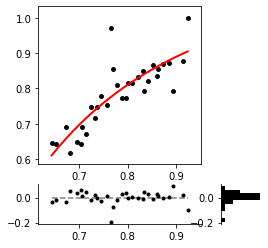

In [8]:
# Path to dataset
dataset = "krug1"
path_data = "../datasets/" + dataset + ".json"

filename = path_data
with open(filename, "r") as f:
    data_json = json.load(f)

# Print json keys
print(data_json.keys())

gpm = GenotypePhenotypeMap(wildtype=data_json["wildtype"],
                           genotypes=data_json["genotypes"],
                           phenotypes= data_json["phenotypes"],
                           stdeviations=data_json["stdeviations"])
# Construct the phenotype data
model = EpistasisPowerTransform(lmbda=-0.5, A=0, B=0,order=1)
# Add Genotype-phenotype map data.
model.add_gpm(gpm)
# Fit the model.
model.fit()
padd = model.Additive.predict()
################### Plotting ######################
fig = plt.figure(figsize=(4,4))
gs = gridspec.GridSpec(2,2, height_ratios=[4,1], width_ratios=[4,1])
# Construct grid.
ax_c = fig.add_subplot(gs[0:1, 0:1])
ax_r = fig.add_subplot(gs[1: , 0:1], sharex=ax_c)
ax_h = fig.add_subplot(gs[1: , 1: ], sharey=ax_r)

### correlation plot
# Infer P_additive


# Plot correlation
pyplot.plot_power_transform(model,ax=ax_c,s=15,function_line=True,color=plt.cm.gray)


# Plot the nonlinear fit
xmodel = np.linspace(min(padd), max(padd), 1000)
ymodel = model.function(xmodel,  A=model.parameters.get("A").value,
                     B=model.parameters.get("B").value,
                    lmbda= model.parameters.get("lmbda").value )

### Plot residuals between observed phenotypes and nonlinear fit
ydata = model.gpm.phenotypes
ymod = model.function(padd, A=model.parameters.get("A").value,
                     B=model.parameters.get("B").value,
                    lmbda= model.parameters.get("lmbda").value )

resid = ymod - ydata
ax_r.hlines(0,min(padd), max(padd), linestyle="--", color="gray")
ax_r.spines["right"].set_visible(False)
ax_r.spines["top"].set_visible(False)
ax_r.plot(padd, resid, '.',color='black')

### histogram
ax_h.spines["right"].set_visible(False)
ax_h.spines["top"].set_visible(False)
ax_h.spines["bottom"].set_visible(False)
ax_h.set_xticks([])
ax_h.hist(resid, bins=10, orientation="horizontal",color='black')

### save fig
fig.savefig("../figures/"+dataset+".pdf", format='pdf', transparent=True, dpi=500, pad_inches = 0)

# Data set III

dict_keys(['authors', 'columns', 'description', 'errors', 'figure', 'filename', 'genotypes', 'journal', 'log_transform', 'mutations', 'n_replicates', 'phenotypes', 'rank', 'replicate 1', 'replicate 2', 'replicate 3', 'stdeviations', 'title', 'url', 'wildtype'])


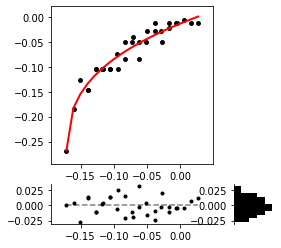

In [9]:
# Path to dataset
dataset = "weinreich"
path_data = "../datasets/" + dataset + ".json"

filename = path_data
with open(filename, "r") as f:
    data_json = json.load(f)

# Print json keys
print(data_json.keys())
data_json["phenotypes"] =  -np.log(data_json["phenotypes"] )

gpm = GenotypePhenotypeMap(wildtype=data_json["wildtype"],
                           genotypes=data_json["genotypes"],
                           phenotypes= data_json["phenotypes"],
                           stdeviations=data_json["stdeviations"])
# Construct the phenotype data
model = EpistasisPowerTransform(lmbda=-1, A=1, B=0)
# Add Genotype-phenotype map data.
model.add_gpm(gpm)
# Fit the model.
model.fit()
padd = model.Additive.predict()
################### Plotting ######################
fig = plt.figure(figsize=(4,4))
gs = gridspec.GridSpec(2,2, height_ratios=[4,1], width_ratios=[4,1])
# Construct grid.
ax_c = fig.add_subplot(gs[0:1, 0:1])
ax_r = fig.add_subplot(gs[1: , 0:1], sharex=ax_c)
ax_h = fig.add_subplot(gs[1: , 1: ], sharey=ax_r)

### correlation plot
# Plot correlation
pyplot.plot_power_transform(model,ax=ax_c,s=15,function_line=True,color=plt.cm.gray)
# Plot the nonlinear fit
xmodel = np.linspace(min(padd), max(padd), 1000)
ymodel = model.function(xmodel,  A=model.parameters.get("A").value,
                     B=model.parameters.get("B").value,
                    lmbda= model.parameters.get("lmbda").value )

### Plot residuals between observed phenotypes and nonlinear fit
ydata = model.gpm.phenotypes
ymod = model.function(padd, A=model.parameters.get("A").value,
                     B=model.parameters.get("B").value,
                    lmbda= model.parameters.get("lmbda").value )

resid = ymod - ydata
ax_r.hlines(0,min(padd), max(padd), linestyle="--", color="gray")
ax_r.spines["right"].set_visible(False)
ax_r.spines["top"].set_visible(False)
ax_r.plot(padd, resid, '.',color='black')

### histogram
ax_h.spines["right"].set_visible(False)
ax_h.spines["top"].set_visible(False)
ax_h.spines["bottom"].set_visible(False)
ax_h.set_xticks([])
ax_h.hist(resid, bins=10, orientation="horizontal",color='black')

### save fig
fig.savefig("../figures/"+dataset+".pdf", format='pdf', transparent=True, dpi=500, pad_inches = 0)

## Data set I

Data set IV was published as $\Delta G$s, but were given to us as $k_a$s. Before fitting with a nonlinear epistasis model, we converted the values to $\Delta G$s to be consistent with the literature.

dict_keys(['figure', 'title', 'authors', 'description', 'url', 'journal', 'wildtype', 'log_transform', 'mutations', 'genotypes', 'phenotypes', 'stdeviations', 'n_replicates'])


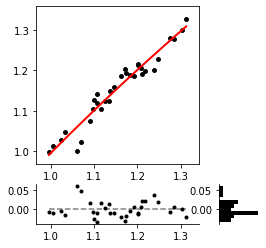

In [10]:
# Path to dataset
dataset = "khan"
path_data = "../datasets/" + dataset + ".json"

filename = path_data
with open(filename, "r") as f:
    data_json = json.load(f)

# Print json keys
print(data_json.keys())

gpm = GenotypePhenotypeMap(wildtype=data_json["wildtype"],
                           genotypes=data_json["genotypes"],
                           phenotypes= data_json["phenotypes"],
                           stdeviations=data_json["stdeviations"])
# Construct the phenotype data
model = EpistasisPowerTransform(lmbda=-1, A=0, B=0)
# Add Genotype-phenotype map data.
model.add_gpm(gpm)
# Fit the model.
model.fit()
padd = model.Additive.predict()
################### Plotting ######################
fig = plt.figure(figsize=(4,4))
gs = gridspec.GridSpec(2,2, height_ratios=[4,1], width_ratios=[4,1])
# Construct grid.
ax_c = fig.add_subplot(gs[0:1, 0:1])
ax_r = fig.add_subplot(gs[1: , 0:1], sharex=ax_c)
ax_h = fig.add_subplot(gs[1: , 1: ], sharey=ax_r)

### correlation plot
# Plot correlation
pyplot.plot_power_transform(model,ax=ax_c,s=15,function_line=True,color=plt.cm.gray)
# Plot the nonlinear fit
xmodel = np.linspace(min(padd), max(padd), 1000)
ymodel = model.function(xmodel,  A=model.parameters.get("A").value,
                     B=model.parameters.get("B").value,
                    lmbda= model.parameters.get("lmbda").value )

### Plot residuals between observed phenotypes and nonlinear fit
ydata = model.gpm.phenotypes
ymod = model.function(padd, A=model.parameters.get("A").value,
                     B=model.parameters.get("B").value,
                    lmbda= model.parameters.get("lmbda").value )

resid = ymod - ydata
ax_r.hlines(0,min(padd), max(padd), linestyle="--", color="gray")
ax_r.spines["right"].set_visible(False)
ax_r.spines["top"].set_visible(False)
ax_r.plot(padd, resid, '.',color='black')

### histogram
ax_h.spines["right"].set_visible(False)
ax_h.spines["top"].set_visible(False)
ax_h.spines["bottom"].set_visible(False)
ax_h.set_xticks([])
ax_h.hist(resid, bins=10, orientation="horizontal",color='black')

### save fig
fig.savefig("../figures/"+dataset+".pdf", format='pdf', transparent=True, dpi=500, pad_inches = 0)